# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [237]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [238]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")

## Load Data

In [239]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...
2016,Telegraph Hill,903.049771,384242,4390
2016,Twin Peaks,970.085470,384242,4390
2016,Van Ness/ Civic Center,552.602567,384242,4390


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [240]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
housing_df= sfo_data[["housing_units"]].groupby('year').mean()

housing_df


,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


In [241]:
# Save the dataframe as a csv file
# YOUR CODE HERE!

housing_df.to_csv('housing_df.csv')

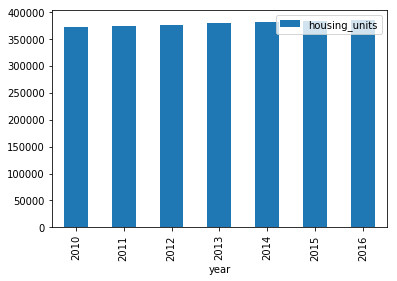

In [242]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!

housing_df.plot.bar()

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [243]:
# Calculate the average sale price per square foot and average gross rent
# YOUR CODE HERE!
gross_rent_df = sfo_data[["gross_rent"]].groupby('year').mean()
gross_rent_df

,gross_rent
year,
2010,1239
2011,1530
2012,2324
2013,2971
2014,3528
2015,3739
2016,4390


In [244]:
sale_price_sqr_df = sfo_data[["sale_price_sqr_foot"]].groupby('year').mean()
sale_price_sqr_df

,sale_price_sqr_foot
year,
2010,369.344353
2011,341.903429
2012,399.389968
2013,483.600304
2014,556.277273
2015,632.540352
2016,697.643709


In [246]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
# YOUR CODE HERE!
sale_price_sqr_df.hvplot(title='Sale Price Per Sq Ft')



# Line chart for average montly rent
# YOUR CODE HERE!

gross_rent_df.hvplot(title= 'Gross Rent')

:Curve   [year]   (gross_rent)

- - - 

In [247]:
sale_price_sqr_df.hvplot(title='Sale Price Per Sq Ft') + gross_rent_df.hvplot(title= 'Gross Rent')

:Layout
   .Curve.I  :Curve   [year]   (sale_price_sqr_foot)
   .Curve.II :Curve   [year]   (gross_rent)

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [248]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!

housing_df = sfo_data.groupby([sfo_data.index ,"neighborhood"]).mean()


sf_sales = housing_df["sale_price_sqr_foot"]

sf_sales_df = pd.DataFrame(sf_sales).reset_index()
sf_sales_df.head()


,year,neighborhood,sale_price_sqr_foot
0,2010,Alamo Square,291.182945
1,2010,Anza Vista,267.932583
2,2010,Bayview,170.098665
3,2010,Buena Vista Park,347.394919
4,2010,Central Richmond,319.027623


In [249]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!

sf_sales_df.hvplot(y = 'sale_price_sqr_foot', x = 'year', groupby='neighborhood')


:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [250]:
# Use hvplot to create an interactive line chart of the average monthly rent.
#rent_df = sfo_data[["neighborhood","gross_rent"]]
#rent_df.plot(groupby='neighborhood')

#housing_df.plot(groupby='neighborhood')

sfo_data.hvplot(y = 'gross_rent', x = 'year',groupby='neighborhood')


# The plot should have a dropdown selector for the neighborhood


# YOUR CODE HERE!

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [251]:
# Getting the data from the top 10 expensive neighborhoods to own
# YOUR CODE HERE!
top_10_most_expensive = sfo_data.sort_values(by='sale_price_sqr_foot', ascending=False).head(10)
top_10_most_expensive.reset_index()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2015,Union Square District,2258.702832,382295,3739
1,2016,Presidio Heights,1465.968586,384242,4390
2,2016,Merced Heights,1416.666667,384242,4390
3,2013,Union Square District,1290.472107,378401,2971
4,2014,Miraloma Park,1267.766203,380348,3528
5,2016,Parnassus/Ashbury Heights,1207.997485,384242,4390
6,2016,Outer Richmond,1196.645437,384242,4390
7,2015,Marina,1132.837361,382295,3739
8,2014,South of Market,1119.838877,380348,3528
9,2015,Corona Heights,1100.791194,382295,3739


In [260]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
#top_10_most_expensive.hvplot.bar()


top_10_most_expensive.hvplot.bar(
    x="neighborhood", y="sale_price_sqr_foot",
    height=400, width=1000
)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [159]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
# YOUR CODE HERE!


#gross_rent_df

sfo_data.head(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239
2010,Central Sunset,418.172493,372560,1239
2010,Corona Heights,369.359338,372560,1239
2010,Cow Hollow,569.379968,372560,1239
2010,Croker Amazon,165.645730,372560,1239


In [256]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!

sfo_data.hvplot.bar(x='year',y=["gross_rent","sale_price_sqr_foot"], title = "Comparing Costs To Purchase", groupby='neighborhood', width = 750, height = 400, rot=90) 


:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [184]:
# Load neighborhoods coordinates data
# YOUR CODE HERE!

hood_coordinates = pd.read_csv(
    Path("neighborhoods_coordinates.csv")
).dropna()
hood_coordinates




,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050
...,...,...,...
68,West Portal,37.740260,-122.463880
69,Western Addition,37.792980,-122.435790
70,Westwood Highlands,37.734700,-122.456854
71,Westwood Park,37.734150,-122.457000


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [257]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
sfo_new = sfo_data.groupby('neighborhood').mean()
sfo_new.reset_index(inplace=True)
#sfo_new.dropna().sort_values(by='gross_rent', ascending=False)
sfo_new.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
sfo_new.head()

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [258]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!

joined_df = pd.merge(hood_coordinates,sfo_new,on='Neighborhood')
joined_df

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.00,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.00,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.00,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.00,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.50,2698.833333
...,...,...,...,...,...,...
64,West Portal,37.740260,-122.463880,498.488485,376940.75,2515.500000
65,Western Addition,37.792980,-122.435790,307.562201,377427.50,2555.166667
66,Westwood Highlands,37.734700,-122.456854,533.703935,376454.00,2250.500000
67,Westwood Park,37.734150,-122.457000,687.087575,382295.00,3959.000000


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

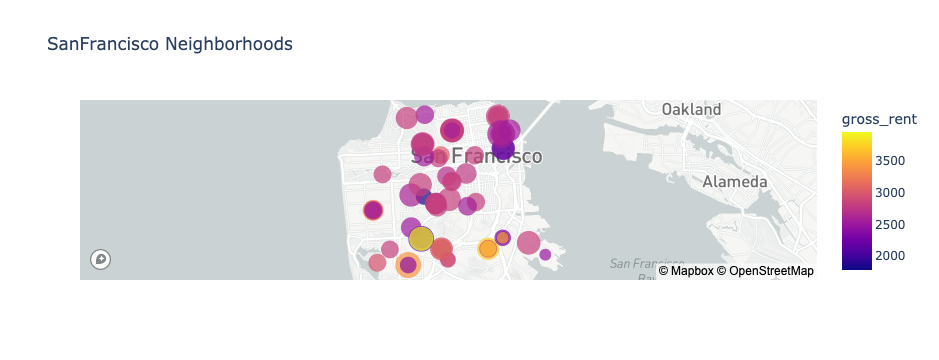

In [259]:
# Set the mapbox access token
# YOUR CODE HERE!
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")

px.set_mapbox_access_token(map_box_api)


# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!

map_plot = px.scatter_mapbox(
    joined_df,
    lat="Lat",
    lon="Lon",
    color="gross_rent",
    size="sale_price_sqr_foot",
    hover_name='Neighborhood',
    zoom=10,
    title='SanFrancisco Neighborhoods',
)
map_plot.show()


- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [20]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


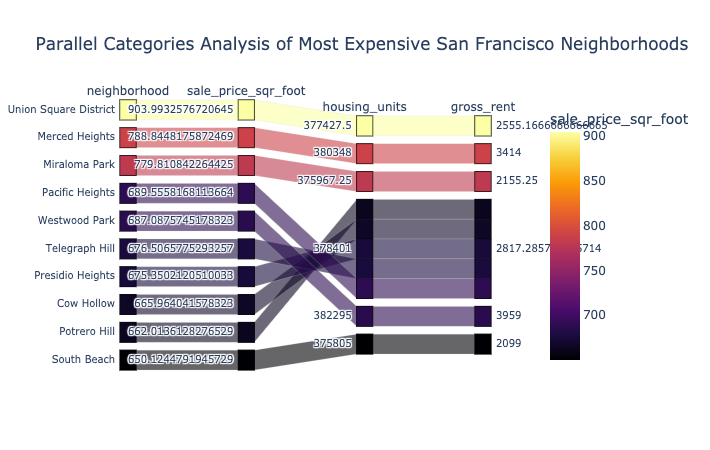

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

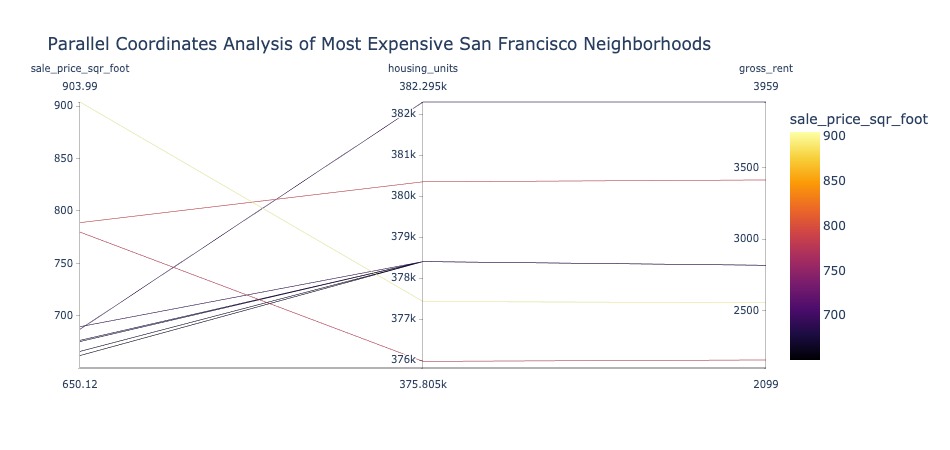

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

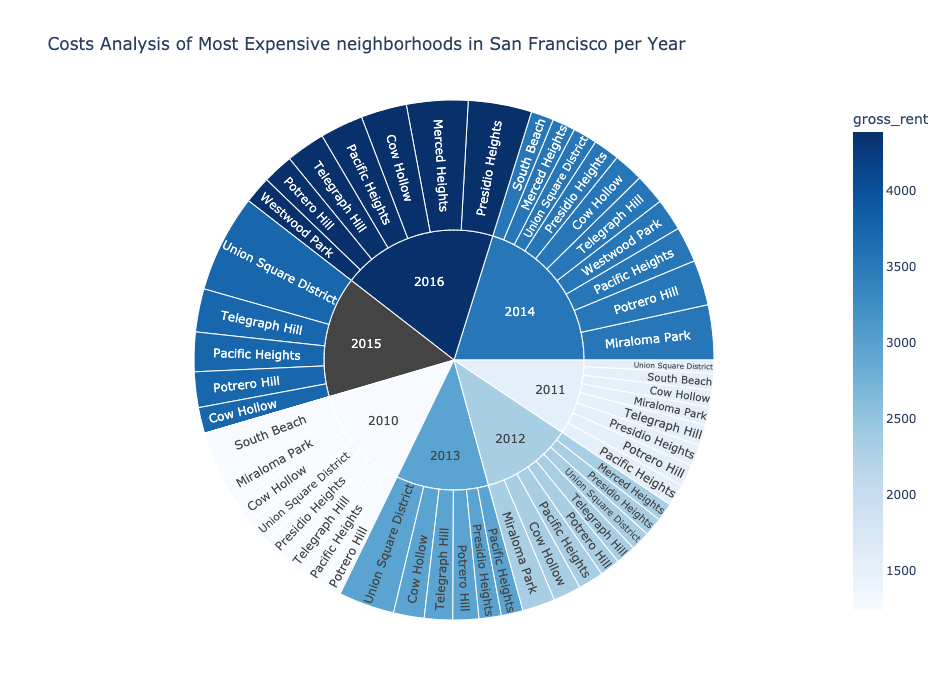

In [23]:
# Sunburst Plot
# YOUR CODE HERE!